In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy import signal

# DFT
The method below uses matrices

In [2]:
x = [1,2,4,8,16,32,64,128]

def DFT(x_in):
    X= []
    N = len(x_in)
    # Weight array
    W = [np.zeros(N).tolist() for l in range(N)]

    for i in range(0, N):
        for k in range(0, N):
            W[i][k]=np.exp(-complex(0,1)*i*2*np.pi*k/N)

    X = np.matmul(x_in,W)

    return X

pd.DataFrame(DFT(x))

,0
0,255.000000+0.000000j
1,48.639610+166.066017j
2,-51.0+00000102.000000j
3,-78.639610+46.066017j
4,-85.0000000-0.0000000j
5,-78.639610-46.066017j
6,-51.0-00000102.000000j
7,48.639610-166.066017j


# Radix-2 Decimation In Time FFT Algorithm

In [3]:
x = [1,2,4,8,16,32,64,128]
# N = 0

The function below, called "inputPrep" reverses the bits fed into the butterfly diagrams at the start. It returns the reversed bits in a list and returns the length of the input sequence.

In [4]:
def inputPrep(x):
    x_len = len(x)
    
    # Determine the power of 2
    power = int(math.log2(x_len))
    
    # Perform the bit reversal
    bitReversal = []
    for n in range(0,x_len):
        bitReversal.append(int('{:0{}b}'.format(n, power)[::-1], 2))
    
    return bitReversal, x_len

## FFT Algorithm

Naming conventions, specifically from the textbook are as follows:
- N = the number of data entries
- S = Stage number, the stages start at the value of 1 and the maximum stage will be $m = log_2(N)$
- bWidth(BWIDTH) = $2^{(S-1)}$, where this represents the "distance" in two points(vertically) that contribute to the butterfly
- bSeperation(BSEP) = $2^{S}$, is the butterfly seperation and it is the "distance" in between the nearest butterflies in a stage that have the same weighting/twiddle factor

The FFT algorithm works as follows:


- FFT 1.1 - Preparing the data for input into the FFT.


- FFT 1.2 - Is a list that contains the reordered values of the array according to the bit reversed indeces.


- FFT 1.3 - The total number of stages.


- FFT 1.4 - Looping over each of the different stage and stopping when reaching the value of m(using m+1 because python for loops stop at the index-1).


- FFT 1.5 - Calculating the butterfly separation and width, notice how each stage they change.


- FFT 1.6 - Calculating the twiddle factors by using a for loop the number of possible weighting factors. J ensures the correct number of twiddle factors when going through the algorithm. Keep in mind if you had to output J as you stepped through you would only get half the twiddle factors, this will be explained in the next point.


- FFT 1.7 - theta is the value of the twiddle factor at a specific point, J controls where exactly on the diagram it will lie. Take the case of bWidth = 2. The first loop J will be 0 and theta will then be 0, causing it to have a value when substituted in to WN of(1,0). The next iteration J becomes one and theta will be 2 $\pi \times 1$  divided by bSeperation which will be 2($2^1$) in the first stage, meaning that it will lie on the negative real axis at (-1,0). This can be seen when the values are graphed in later section. WN is the complex sinusoid itself, which when plotted achieve the coordinate described above.


- FFT 1.8 - This for loop steps in values of bSeperation from J to N. This handles the order of summation and subtraction of the butterflies.


- FFT 1.9 - The temp variable is there to help save computational resources as it only has to be calculated once.


- FFT 1.10 - Each butterfly has the top branch output of the top and bottom input branch's summation, while the bottom output branch is the subtraction of the top and bottom input branch.


- FFT 1.11 - Plotting the Twiddle Factors.

In [5]:
def fftAlgo(x_in, plot=True):
    
    # --- FFT 1.1 --- #
    bitReversal, N = inputPrep(x_in)
    
    new_x = np.zeros(N).tolist()
    for i in range(N):
                    # [Bit value]
        new_x[i] = x_in[bitReversal[i]]
    
    # --- FFT 1.2 --- #
    x_in = new_x
    
    # =================================================================================== #
    # --------------------------------- FFT Begins--------------------------------------- #
    # Code adapted from pg 131 "Digital Signal Processing: A Practical Approach"          #
    # - Second Edition by Emmanuel C. Ifeachor and Barrie Jervis                          #
    # =================================================================================== #
        
    # --- FFT 1.3 --- #
    m = int(np.log2(N)) 
    
    
    # --- FFT 1.4 --- #
    for S in range(1, m+1):
        
        # --- FFT 1.5 --- #
        bSeperation = 2**S
        bWidth = 2**(S-1) 

        # --- FFT 1.6 --- #
        for J in range(0,bWidth):
            
            # --- FFT 1.7 --- #
            theta = 2*np.pi*J/bSeperation
            WN = np.exp(-complex(0,1)*theta)
                        
            # --- FFT 1.8 --- #
            for top in range(J, N, bSeperation):
                bottom = top + bWidth
                
                # --- FFT 1.9 --- #
                temp = x_in[bottom] * WN
                
                # --- FFT 1.10 --- #
                x_in[bottom] = x_in[top] - temp
                x_in[top] = x_in[top] + temp
            
            # --- FFT 1.11 --- #
            if plot == True:
                plt.plot(np.real(WN), np.imag(WN),'rx')
                plt.plot(-np.real(WN), -np.imag(WN),'bx')
                
        if plot == True:
            plt.grid()
            plt.title(f"Polar plot of the twiddle factors in use for stage {S}")
            plt.xlim(-1.5,1.5)
            plt.ylim(-1.5,1.5)
            plt.show()
            
    return x_in

## Twiddle Factor

The output below shows the twiddle factor for the data in a real and imaginary plane. It has no use for the FFT algorithm in the sense of placement, and it is helpful for debugging, especially when working with more than four samples. The blue crosses are the negative of the red crosses in the diagram. The red crosses are technically the only values in use in the algorithm. However, the blue crosses become included when using the butterfly diagrams, specifically when the input bottom branch goes to the output bottom branch. That has a subtraction on the bottom branch value.

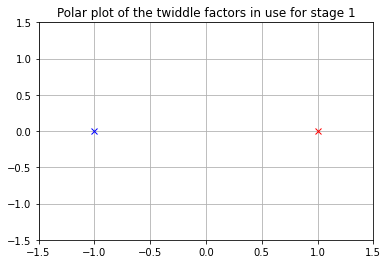

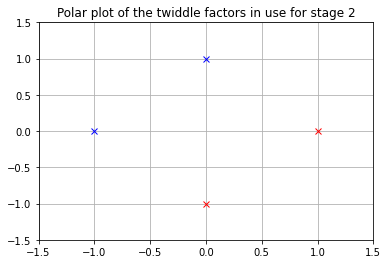

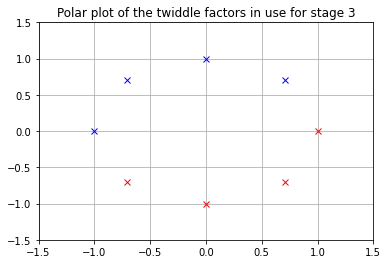

,0
0,255.000000+0.000000j
1,48.639610+166.066017j
2,-51.0+00000102.000000j
3,-78.639610+46.066017j
4,-85.0000000+0.0000000j
5,-78.639610-46.066017j
6,-51.0-00000102.000000j
7,48.639610-166.066017j


In [6]:
# Outputing the Results from the FFT Algorithm
X_out = fftAlgo(x)
pd.DataFrame(data = X_out)

## Magnitude

In [7]:
def fftNormalize(x, numN):
    fftOut = x
    fftMag = [0]*len(x)
    
    # Handling the DC offset 
    fftMag[0] = 20*np.log10( ( cmath.sqrt( pow( np.real(fftOut[0]),2 ) + pow( np.imag(fftOut[0]),2 ) ) ) /numN);
    
    # Magnitude that is double and will be folded over
    for i in range(1,numN):
        fftMag[i] = 20*np.log10( ( cmath.sqrt( pow( np.real(fftOut[i]),2 ) + pow( np.imag(fftOut[i]),2) )*2)/numN);
        
    return fftMag

In [8]:
fftMagOutput = fftNormalize(X_out,len(X_out))
df = pd.DataFrame(fftMagOutput)
df

,0
0,30.069004+0.000000j
1,32.721860+0.000000j
2,29.099904+0.000000j
3,27.152859+0.000000j
4,26.547179+0.000000j
5,27.152859+0.000000j
6,29.099904+0.000000j
7,32.721860+0.000000j


## Phase

In [9]:
def fftPhase(x, numN):
    fftOut = x
    fftPh = [0]*len(x)
    
    # Magnitude that is double and will be folded over
    for i in range(0,numN):
        if np.real(fftOut[i]) == 0:
            fftPh[i] = np.pi/2
        else:
            fftPh[i] = cmath.atan(np.imag(fftOut[i])/np.real(fftOut[i]))

        
    return fftPh

In [10]:
fftPhaseOutput = fftPhase(X_out,len(X_out))
df = pd.DataFrame(fftPhaseOutput)
df

,0
0,0.000000+0.000000j
1,1.285872+0.000000j
2,-1.107149+0.000000j
3,-0.529903+0.000000j
4,-0.000000+0.000000j
5,0.529903+0.000000j
6,1.107149+0.000000j
7,-1.285872+0.000000j


# Simulating FFT DSP Output

## Magnitude

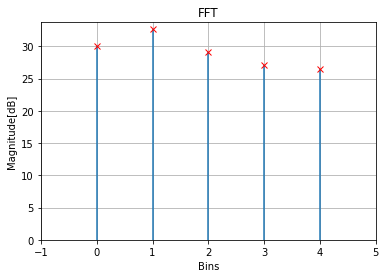

In [11]:
fftMagInt = [0]*int(len(fftMagOutput)/2 + 1)
for i in range(0, len(fftMagInt)):
    fftMagInt[i] = np.real(fftMagOutput[i])
    plt.vlines(ymin = 0, ymax = fftMagInt[i], x = i, linestyles='solid')
    plt.plot(i, fftMagInt[i], 'rx')

plt.title('FFT')
plt.xlabel('Bins')
plt.ylabel('Magnitude[dB]')
plt.xlim(-1,len(fftMagInt))
plt.ylim(0,max(fftMagInt)+1)
plt.grid()
plt.show()

## Phase 

[]

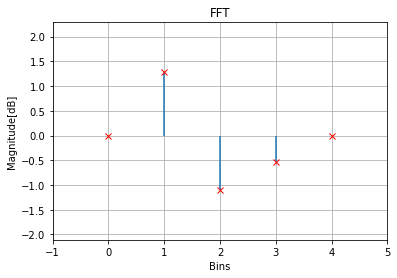

In [12]:
# Only displaying half because it is a reflection
fftPhaseInt = [0]*int(len(fftPhaseOutput)/2 + 1) 
for i in range(0,len(fftPhaseInt)):
    fftPhaseInt[i] = (np.real(fftPhaseOutput[i]))
    if fftPhaseInt[i] <= 0:
        plt.vlines(ymin=fftPhaseInt[i], ymax=0, x=i)
        plt.plot(i,fftPhaseInt[i],'rx')
    else:
        plt.vlines(ymin=0, ymax=fftPhaseInt[i], x=i)
        plt.plot(i,fftPhaseInt[i],'rx')
    
plt.xlabel('Bins')
plt.ylabel('Magnitude[dB]')
plt.title('FFT')
plt.xlim(-1,len(fftPhaseInt))
plt.ylim(min(fftPhaseInt)-1,max(fftPhaseInt)+1)
plt.grid()
plt.plot()

# Testing algorithm against the DFT
The following code blocks are used to test the FFT and DFT algorithm

[]

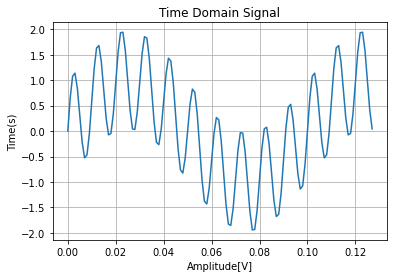

In [13]:
offset = 0
sampling_freq = 1000
frequency = 100
noise_freq = 10
N = 128 

t = np.arange(0,N*(1/sampling_freq),1/sampling_freq)

# --- Introducing noise to the original signal --- #
noise = np.sin(2*np.pi*t*noise_freq) 

# --- Sinusoidal signal that has the noise signal added to it
sinusoidal_sig =  offset + np.sin(2*np.pi*t*frequency) + noise

plt.plot(t,sinusoidal_sig)
plt.title("Time Domain Signal")
plt.grid()
plt.xlabel("Amplitude[V]")
plt.ylabel("Time(s)")
plt.plot()

## DFT Check

[]

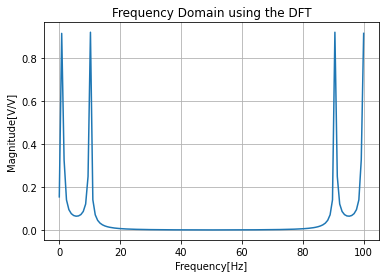

In [14]:
dft = DFT(sinusoidal_sig)

dftMag = []
for i in dft:
    dftMag.append((abs(i)*2)/N)

# halving the DC signal
dftMag[0] = dftMag[0]/2
w = (2*np.pi*frequency)/(N - 1)

fDomain = np.arange(0, N)*w/(2*np.pi)

plt.plot(fDomain[0:N], dftMag[0:N])
plt.title("Frequency Domain using the DFT")
plt.grid()
plt.ylabel("Magnitude[V/V]")
plt.xlabel("Frequency[Hz]")
plt.plot()

## FFT Check

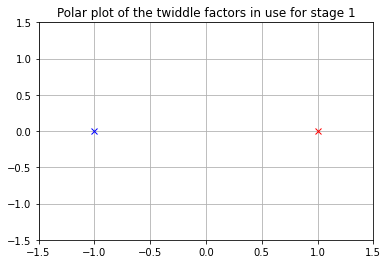

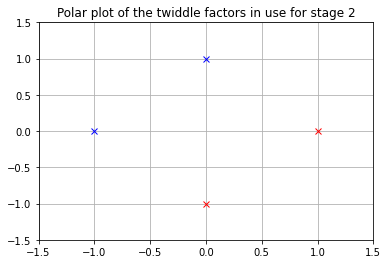

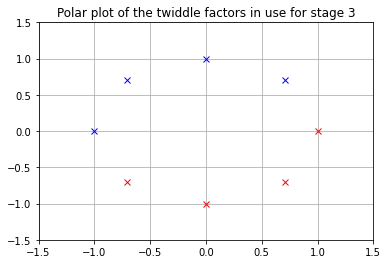

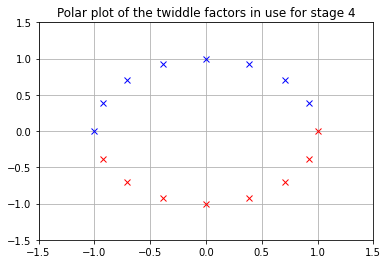

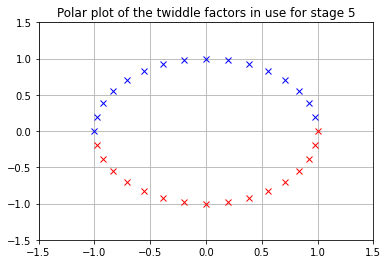

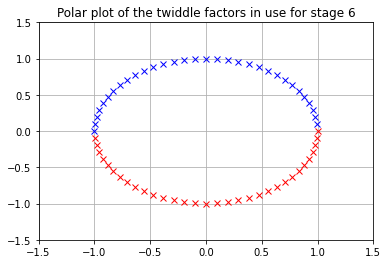

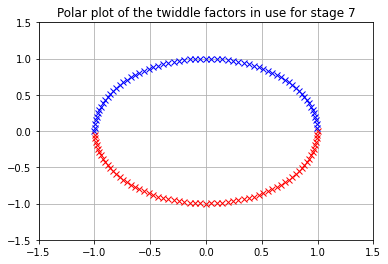

[]

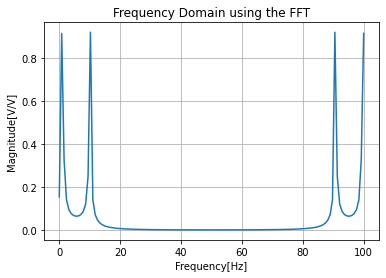

In [15]:
dft = fftAlgo(sinusoidal_sig)

dftMag = []
for i in dft:
    dftMag.append((abs(i)*2)/N)

dftMag[0] = dftMag[0]/2
w = (2*np.pi*frequency)/(N - 1)

fDomain = np.arange(0, N)*w/(2*np.pi)

plt.plot(fDomain[0:N], dftMag[0:N])
plt.title("Frequency Domain using the FFT")
plt.grid()
plt.ylabel("Magnitude[V/V]")
plt.xlabel("Frequency[Hz]")
plt.plot()